In [37]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import signal

from shapely.geometry import Point

On rassemble tous les dataset de tous les cours d'eau

In [38]:
stations_meteo = gpd.read_file("../Data/Brut/Meteo/postesSynop.json")
stations_meteo

,ID,Nom,Latitude,Longitude,Altitude,geometry
0,07005,ABBEVILLE,50.136000,1.834000,69,POINT (1.83400 50.13600)
1,07015,LILLE-LESQUIN,50.570000,3.097500,47,POINT (3.09750 50.57000)
2,07020,PTE DE LA HAGUE,49.725167,-1.939833,6,POINT (-1.93983 49.72517)
3,07027,CAEN-CARPIQUET,49.180000,-0.456167,67,POINT (-0.45617 49.18000)
4,07037,ROUEN-BOOS,49.383000,1.181667,151,POINT (1.18167 49.38300)
...,...,...,...,...,...,...
57,81401,SAINT LAURENT,5.485500,-54.031667,5,POINT (-54.03167 5.48550)
58,81405,CAYENNE-MATOURY,4.822333,-52.365333,4,POINT (-52.36533 4.82233)
59,81408,SAINT GEORGES,3.890667,-51.804667,6,POINT (-51.80467 3.89067)
60,81415,MARIPASOULA,3.640167,-54.028333,106,POINT (-54.02833 3.64017)


<AxesSubplot:>

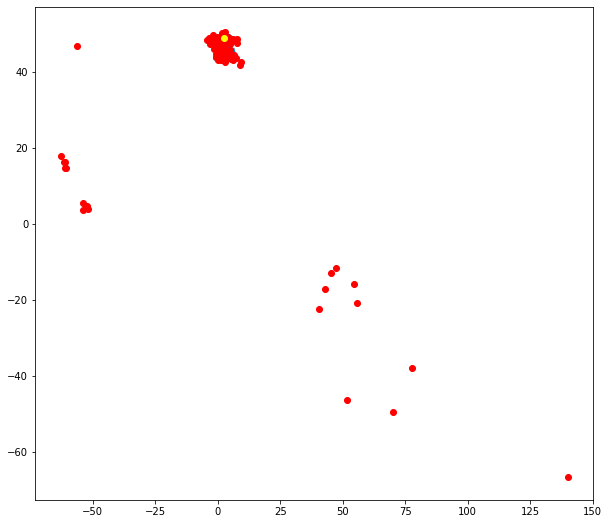

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

france = world[world['name'] == "France"].geometry.explode()[[1,2]].unary_union

base = gpd.GeoSeries(france).plot(figsize = (10, 10))
stations_meteo.plot(ax = base, color = "red")
cities[cities['name'] == "Paris"].plot(ax = base, color = "yellow")

<AxesSubplot:>

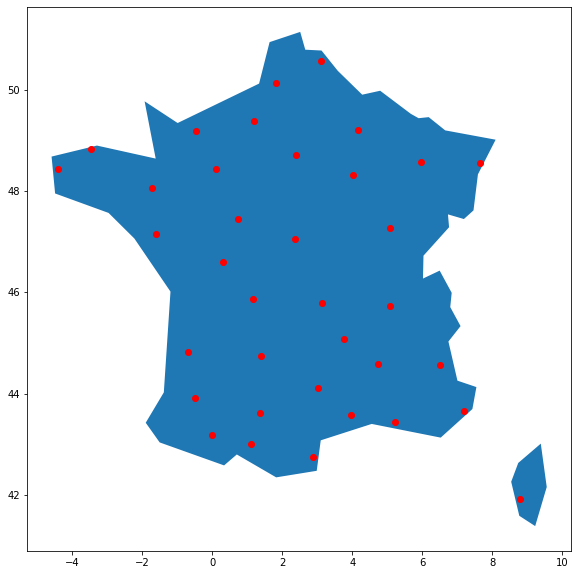

In [22]:
# On prend les stations en France métropolitaine.

base = gpd.GeoSeries(france).plot(figsize = (10, 10))
stations_meteo = stations_meteo[stations_meteo["geometry"].within(france)]
stations_meteo.plot(ax = base, color = "red")

In [23]:
stations_meteo

,ID,Nom,Latitude,Longitude,Altitude,geometry
0,07005,ABBEVILLE,50.136000,1.834000,69,POINT (1.83400 50.13600)
1,07015,LILLE-LESQUIN,50.570000,3.097500,47,POINT (3.09750 50.57000)
3,07027,CAEN-CARPIQUET,49.180000,-0.456167,67,POINT (-0.45617 49.18000)
4,07037,ROUEN-BOOS,49.383000,1.181667,151,POINT (1.18167 49.38300)
5,07072,REIMS-PRUNAY,49.209667,4.155333,95,POINT (4.15533 49.20967)
6,07110,BREST-GUIPAVAS,48.444167,-4.412000,94,POINT (-4.41200 48.44417)
7,07117,PLOUMANAC'H,48.825833,-3.473167,55,POINT (-3.47317 48.82583)
8,07130,RENNES-ST JACQUES,48.068833,-1.734000,36,POINT (-1.73400 48.06883)
9,07139,ALENCON,48.445500,0.110167,143,POINT (0.11017 48.44550)
10,07149,ORLY,48.716833,2.384333,89,POINT (2.38433 48.71683)


In [24]:
import requests